In [ ]:
!unrar x "/content/data.rar"

In [1]:
import tensorflow as tf 
import os
import cv2
import imghdr


In [64]:
data_dir = "data"
# labels = ["capacitor","resistor"]
# if not os.path.exists(data_dir):
#     os.mkdir(data_dir)
# for label in labels:
#     label_path = os.path.join(data_dir,label)
#     if not os.path.exists(label):
#         os.mkdir(label_path)

In [ ]:
img_extentions = ["jpeg","jpg","png"]
for label in labels:
    for image in os.listdir(os.path.join(data_dir,label)):
        try:
            image_path = os.path.join(data_dir,label,image)
            img = cv2.imread(image_path)
            img_ext = imghdr.what(image_path)
            if not img_ext in img_extentions:
                os.remove(image_path)
        except Exception as e:
            print("erreur : ",e)
            # os.remove(image_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 6811 files belonging to 2 classes.


In [69]:
data_iterator = data.as_numpy_iterator()

In [70]:
batch = data_iterator.next()
len(batch[0])

32

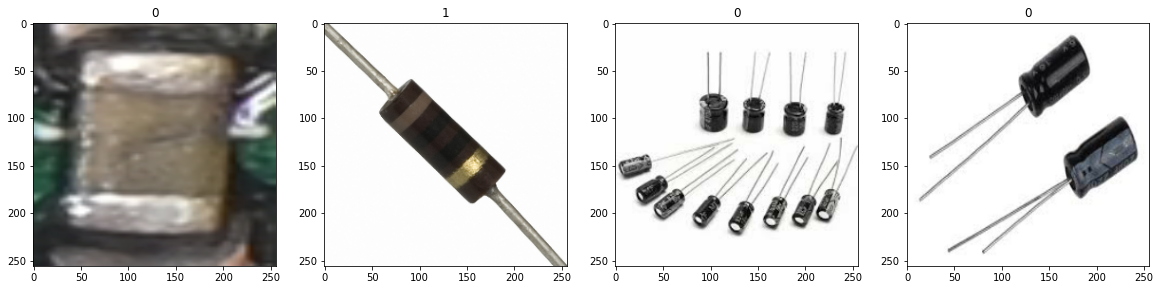

In [71]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx,image in enumerate(batch[0][:4]):
    ax[idx].imshow(image.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [72]:
print("la valeur maximum de l'image est : " ,batch[0].max())
print("la valeur minimum de l'image est : " ,batch[0].min())

la valeur maximum de l'image est :  255.0
la valeur minimum de l'image est :  0.0


In [73]:
data = data.map(lambda x,y: (x/255,y))

In [74]:
scaled_batch = data.as_numpy_iterator()

In [79]:
batch_new = scaled_batch.next()

In [80]:
print("la valeur maximum de l'image est : " ,batch_new[0].max())
print("la valeur minimum de l'image est : " ,batch_new[0].min())

la valeur maximum de l'image est :  1.0
la valeur minimum de l'image est :  0.0


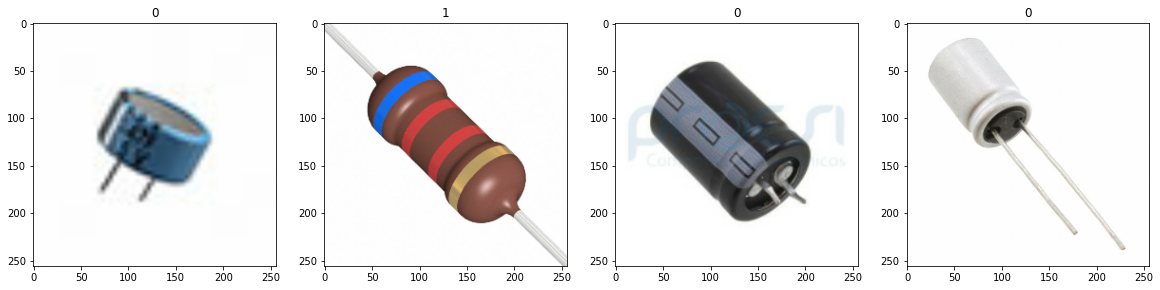

In [81]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx,image in enumerate(batch_new[0][:4]):
    ax[idx].imshow(image)
    ax[idx].title.set_text(batch_new[1][idx])

In [82]:
train_size = int(len(data)*.7) 
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1) + 1

In [83]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip((train_size + val_size)).take(test_size)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [89]:
model = Sequential([
    Conv2D(16,(3,3),1,activation="relu",input_shape=(256,256,3)),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(32,(3,3),1,activation="relu"),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(16,(3,3),1,activation="relu"),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(256,activation="relu"),
    Dropout(0.5),
    Dense(1,activation="sigmoid")

])

In [90]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)       

In [91]:
model.compile("adam",loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [92]:
logdir = "logs"
if not os.path.exists(os.path.join(logdir)):
    os.mkdir(os.path.join(logdir))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [93]:
hist = model.fit(train_data,epochs=20,validation_data=val_data,callbacks=[tensorboard_callback])

Epoch 1/20
149/149 [==============================] - 35s 231ms/step - loss: 0.5322 - accuracy: 0.7253 - val_loss: 0.2219 - val_accuracy: 0.9055
Epoch 2/20
149/149 [==============================] - 35s 230ms/step - loss: 0.1856 - accuracy: 0.9228 - val_loss: 0.1433 - val_accuracy: 0.9420
Epoch 3/20
149/149 [==============================] - 35s 229ms/step - loss: 0.1351 - accuracy: 0.9482 - val_loss: 0.1181 - val_accuracy: 0.9539
Epoch 4/20
149/149 [==============================] - 36s 237ms/step - loss: 0.0998 - accuracy: 0.9616 - val_loss: 0.1195 - val_accuracy: 0.9576
Epoch 5/20
149/149 [==============================] - 35s 231ms/step - loss: 0.0933 - accuracy: 0.9641 - val_loss: 0.1042 - val_accuracy: 0.9643
Epoch 6/20
149/149 [==============================] - 35s 230ms/step - loss: 0.0782 - accuracy: 0.9696 - val_loss: 0.0997 - val_accuracy: 0.9628
Epoch 7/20
149/149 [==============================] - 35s 231ms/step - loss: 0.0731 - accuracy: 0.9759 - val_loss: 0.0867 - val_ac

**3. plot performance**

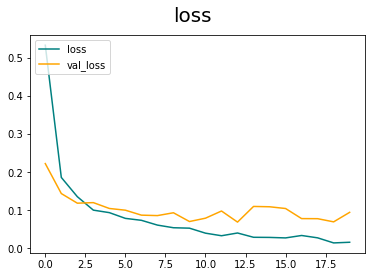

In [94]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal",label="loss")
plt.plot(hist.history["val_loss"],color="orange",label="val_loss")
fig.suptitle("loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()

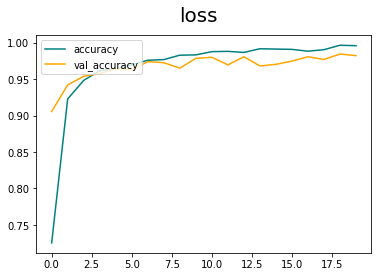

In [95]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal",label="accuracy")
plt.plot(hist.history["val_accuracy"],color="orange",label="val_accuracy")
fig.suptitle("loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()

**4. sauvegarder le model**

In [96]:
model.save("cap_vs_res_with_reg.h5")